data source = https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval

In [3]:
pd.set_option('display.max_columns',500)

# theme color for data vizualisation
c_scheme10 = ['#00A388', '#1CAD8A', '#39B78D', '#55C28F', '#71CC91',
           '#8ED694', '#AAE096', '#C6EB98', '#E3F59B', '#FFFF9D']
c_scheme12 = ['#1c5648','#00A388', '#1CAD8A', '#39B78D', '#55C28F', '#71CC91',
           '#8ED694', '#AAE096', '#C6EB98', '#E3F59B', '#FFFF9D', '#FFFF9D']
c_scheme5 = [ '#1CAD8A', '#55C28F', '#8ED694', '#C6EB98', '#FFFF9D']

In [4]:
# md = movie dataset
md_rating_small = pd.read_csv('ratings_small.csv')
md_meta = pd.read_csv('movies_metadata.csv')
md_link_small = pd.read_csv('links_small.csv')
md_credits = pd.read_csv('credits.csv')
md_keyword = pd.read_csv('keywords.csv')

In [5]:
data = [md_link_small, md_meta, md_rating_small, md_credits, md_keyword]
data_strings = ['md_link_small', 'md_meta', 'md_rating_small', 'md_credits', 'md_keyword']

i=0
for item in data:
    print("{} shape is {}".format(data_strings[i], str(item.shape)))
    i+=1

md_link_small shape is (9125, 3)
md_meta shape is (45466, 24)
md_rating_small shape is (100004, 4)
md_credits shape is (45476, 3)
md_keyword shape is (46419, 2)


# 1. Extract Information from md_meta

In [6]:
md_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [7]:
md_meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


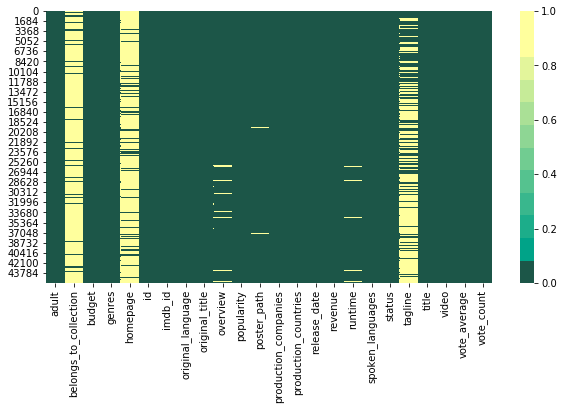

In [8]:
#  cek null values
plt.figure(figsize=(10,5))
sns.heatmap(md_meta.isnull(), cmap=c_scheme12)
plt.show()

In [9]:
# clening data
# https://image.tmdb.org/t/p/original+str path
md_meta.dropna(subset=['revenue', 'overview', 'release_date'], inplace=True)

In [10]:
md_meta['budget'] = pd.to_numeric(md_meta['budget'], errors='coerce')
md_meta['popularity'] = pd.to_numeric(md_meta['popularity'], errors='coerce')
md_meta['id'] = pd.to_numeric(md_meta['id'], errors='coerce') # errors = coerce --> np.nan value
md_meta['release_date'] = pd.to_datetime(md_meta['release_date'])

In [11]:
def extrac_genre(x):
    x = literal_eval(x) # convert to dict.
    kotak_genre = []
    if(len(x)>0):
        for item in x:
            kotak_genre.append(item['name']) # get value with key of dict 'name'
    return kotak_genre

def extrac_lang(x):
    x = literal_eval(x) # convert to dict.
    kotak_lang = []
    if(len(x)>0):
        for item in x:
            kotak_lang.append(item['name']) # get value with key of dict 'name'
    return kotak_lang

def extrac_produc_companies(x):
    x = literal_eval(x['production_companies'])
    kotak_compan = []
    for item in x:
        kotak_compan.append(item['name'].replace(' ',''))
    return kotak_compan

def extrac_produc_countries(x):
    x = literal_eval(x['production_countries'])
    kotak_negara = []
    for item in x:
        kotak_negara.append(item['name'].replace(' ',''))
    return kotak_negara

def add_full_url(x):
    full = 'https://image.tmdb.org/t/p/original'
    links = full + str(x['poster_path'])
    return links

In [12]:
# extract info
md_meta['genre_new'] = md_meta['genres'].apply(extrac_genre)
md_meta['lang_new']  = md_meta['spoken_languages'].apply(extrac_lang)
md_meta['name_companies']  = md_meta.apply(extrac_produc_companies, axis=1)
md_meta['name_country']  = md_meta.apply(extrac_produc_countries, axis=1)
md_meta['poster_path'] = md_meta.apply(add_full_url, axis=1)

In [13]:
md_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44435 entries, 0 to 45465
Data columns (total 28 columns):
adult                    44435 non-null object
belongs_to_collection    4429 non-null object
budget                   44435 non-null int64
genres                   44435 non-null object
homepage                 7749 non-null object
id                       44435 non-null int64
imdb_id                  44423 non-null object
original_language        44425 non-null object
original_title           44435 non-null object
overview                 44435 non-null object
popularity               44435 non-null float64
poster_path              44435 non-null object
production_companies     44435 non-null object
production_countries     44435 non-null object
release_date             44435 non-null datetime64[ns]
revenue                  44435 non-null float64
runtime                  44435 non-null float64
spoken_languages         44435 non-null object
status                   44371 non-nul

In [14]:
md_meta.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_new,lang_new,name_companies,name_country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,https://image.tmdb.org/t/p/original/rhIRbceoE9...,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",[English],[PixarAnimationStudios],[UnitedStatesofAmerica]
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,https://image.tmdb.org/t/p/original/vzmL6fP7aP...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStarPictures, TeitlerFilm, InterscopeCommu...",[UnitedStatesofAmerica]
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,https://image.tmdb.org/t/p/original/6ksm1sjKMF...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",[English],"[WarnerBros., LancasterGate]",[UnitedStatesofAmerica]


# 2. Extract Information from md_credits

In [15]:
def extract_cast(x):
    hasil_literal = literal_eval(x['cast'])
    kotak_cast =[]
    for subject in hasil_literal:
        hoi = subject['name'].replace(' ','')
        kotak_cast.append(hoi)
    return kotak_cast

def extract_director(x):
    hasil_literal = literal_eval(x['crew'])
    kotak_director = []
    for subject in hasil_literal:
        if(subject['job'] == 'Director'):
            name_dir = subject['name'].replace(' ','')
            kotak_director.append(name_dir)
            break
    return kotak_director

In [16]:
md_credits['cast_name'] = md_credits.apply(extract_cast, axis=1)
md_credits['director_name'] = md_credits.apply(extract_director, axis=1)

In [17]:
md_credits.head()

,cast,crew,id,cast_name,director_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter]
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston]
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch]
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker]
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer]


In [18]:
literal_eval(md_credits['crew'].iloc[0])

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

# 3. Extract Keyword

In [19]:
def extrac_keywords(x):
    x = literal_eval(x['keywords'])
    kotak_compan = []
    for item in x:
        kotak_compan.append(item['name'])
    return kotak_compan

In [20]:
md_keyword['words'] = md_keyword.apply(extrac_keywords, axis=1)

# 4. Merge md_meta, md_credits and md_keywords on = 'id'

In [21]:
print("meta shape :",md_meta.shape)
md_full = md_meta.merge(md_credits, on='id')
print("hasil merge kredits:", md_full.shape)
md_full = md_full.merge(md_keyword, on='id')
print("hasil merge keyword:", md_full.shape)

meta shape : (44435, 28)
hasil merge kredits: (44510, 32)
hasil merge keyword: (45558, 34)


In [22]:
md_full.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_new,lang_new,name_companies,name_country,cast,crew,cast_name,director_name,keywords,words
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,https://image.tmdb.org/t/p/original/rhIRbceoE9...,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",[English],[PixarAnimationStudios],[UnitedStatesofAmerica],"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,https://image.tmdb.org/t/p/original/vzmL6fP7aP...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStarPictures, TeitlerFilm, InterscopeCommu...",[UnitedStatesofAmerica],"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."


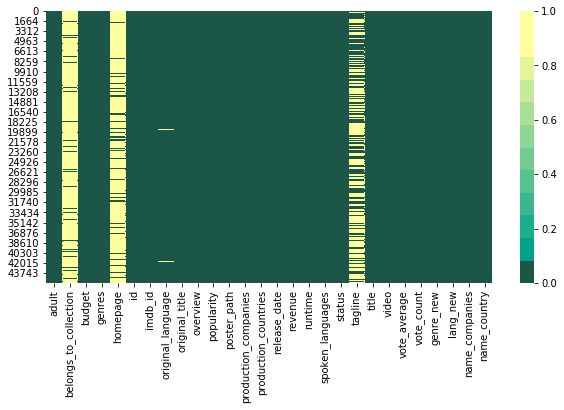

In [23]:
#  cek null values
plt.figure(figsize=(10,5))
sns.heatmap(md_meta.isnull(), cmap=c_scheme12)
plt.show()

In [24]:
md_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45558 entries, 0 to 45557
Data columns (total 34 columns):
adult                    45558 non-null object
belongs_to_collection    4511 non-null object
budget                   45558 non-null int64
genres                   45558 non-null object
homepage                 7979 non-null object
id                       45558 non-null int64
imdb_id                  45546 non-null object
original_language        45548 non-null object
original_title           45558 non-null object
overview                 45558 non-null object
popularity               45558 non-null float64
poster_path              45558 non-null object
production_companies     45558 non-null object
production_countries     45558 non-null object
release_date             45558 non-null datetime64[ns]
revenue                  45558 non-null float64
runtime                  45558 non-null float64
spoken_languages         45558 non-null object
status                   45493 non-nul

In [25]:
print(md_full.shape)
md_full.dropna(subset=['original_language'], inplace=True)
print(md_full.shape)

(45558, 34)
(45548, 34)


# 4. Make Weighted Rating

**rumus weight rating (WR)**

$$ WR = (v / (v+m))*R + (m / (v+m))*C $$

- v adalah jumlah vote dalam sebuah movie
- m is jumlah vote minimum untuk sebuah movie agar dapat masuk dalam list
- R is nilai rating rata2 sebuah film
- C is the mean vote across the whole report

In [26]:
m = md_full['vote_count'].quantile(0.9)
C = md_full['vote_average'].mean()

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    hasil = (v/(v+m)) * R + (m/(v+m)) * C
    return hasil

In [27]:
md_full['weighted_rating'] = md_full.apply(weighted_rating, axis=1)

In [28]:
md_full.tail(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_new,lang_new,name_companies,name_country,cast,crew,cast_name,director_name,keywords,words,weighted_rating
45556,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,https://image.tmdb.org/t/p/original/aorBPO7ak8...,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,[],[],[Yermoliev],[Russia],"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...","[IwanMosschuchin, NathalieLissenko, PavelPavlo...",[YakovProtazanov],[],[],5.637591
45557,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,https://image.tmdb.org/t/p/original/s5UkZt6NTs...,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0,[],[English],[],[UnitedKingdom],[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",[],[DaisyAsquith],[],[],5.637591


In [29]:
col= ['id',  'poster_path', 'title', 'vote_average', 'vote_count','weighted_rating', 'popularity', 'budget',
 'revenue', 'runtime', 'genre_new', 'lang_new', 'name_companies', 'name_country', 'cast_name',
 'director_name', 'overview', 'words', 'release_date']

In [30]:
md_terpilih = md_full[col]
md_terpilih.head()

,id,poster_path,title,vote_average,vote_count,weighted_rating,popularity,budget,revenue,runtime,genre_new,lang_new,name_companies,name_country,cast_name,director_name,overview,words,release_date
0,862,https://image.tmdb.org/t/p/original/rhIRbceoE9...,Toy Story,7.7,5415.0,7.640091,21.946943,30000000,373554033.0,81.0,"[Animation, Comedy, Family]",[English],[PixarAnimationStudios],[UnitedStatesofAmerica],"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"Led by Woody, Andy's toys live happily in his ...","[jealousy, toy, boy, friendship, friends, riva...",1995-10-30
1,8844,https://image.tmdb.org/t/p/original/vzmL6fP7aP...,Jumanji,6.9,2413.0,6.820579,17.015539,65000000,262797249.0,104.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStarPictures, TeitlerFilm, InterscopeCommu...",[UnitedStatesofAmerica],"[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],When siblings Judy and Peter discover an encha...,"[board game, disappearance, based on children'...",1995-12-15
2,15602,https://image.tmdb.org/t/p/original/6ksm1sjKMF...,Grumpier Old Men,6.5,92.0,5.949960,11.712900,0,0.0,101.0,"[Romance, Comedy]",[English],"[WarnerBros., LancasterGate]",[UnitedStatesofAmerica],"[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],A family wedding reignites the ancient feud be...,"[fishing, best friend, duringcreditsstinger, o...",1995-12-22
3,31357,https://image.tmdb.org/t/p/original/16XOMpEaLW...,Waiting to Exhale,6.1,34.0,5.717805,3.859495,16000000,81452156.0,127.0,"[Comedy, Drama, Romance]",[English],[TwentiethCenturyFoxFilmCorporation],[UnitedStatesofAmerica],"[WhitneyHouston, AngelaBassett, LorettaDevine,...",[ForestWhitaker],"Cheated on, mistreated and stepped on, the wom...","[based on novel, interracial relationship, sin...",1995-12-22
4,11862,https://image.tmdb.org/t/p/original/e64sOI48hQ...,Father of the Bride Part II,5.7,173.0,5.669820,8.387519,0,76578911.0,106.0,[Comedy],[English],"[SandollarProductions, TouchstonePictures]",[UnitedStatesofAmerica],"[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],Just when George Banks has recovered from his ...,"[baby, midlife crisis, confidence, aging, daug...",1995-02-10


# 5. Explorality Data Analyst

## <center>=========== GLOBAL Part =========</center>

Text(0.5, 1.0, 'Distribution of Weighted Rating')

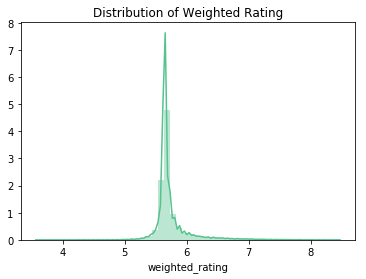

In [31]:
sns.distplot(md_terpilih['weighted_rating'].dropna(), bins=50, color=c_scheme5[1])
plt.title("Distribution of Weighted Rating")

Text(0.5, 1.0, 'Distribution of Runtime')

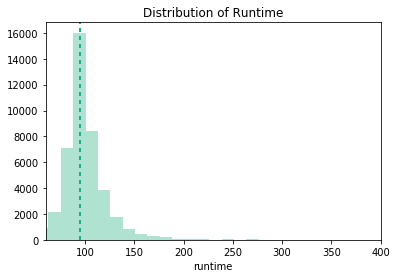

In [32]:
sns.distplot(md_terpilih['runtime'], kde=False, bins=100, color=c_scheme12[3])
plt.axvline((md_terpilih['runtime'].median()), color=c_scheme5[0], dashes=[2,2] , linewidth=2)
plt.xlim(60,400)
plt.title('Distribution of Runtime')

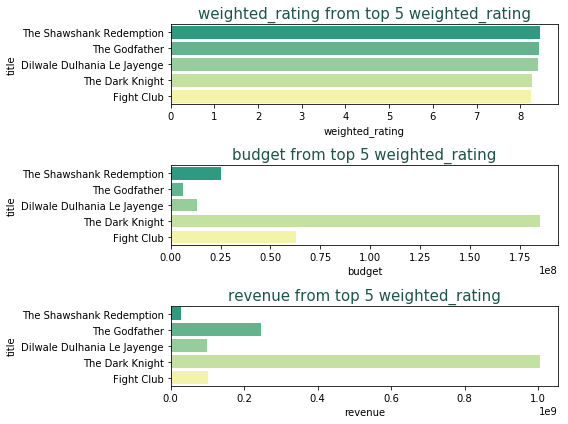

In [33]:
# apa 5 film paling mahal?
kotak_tampilkan = ['weighted_rating', 'budget', 'revenue']
plt.figure(figsize=(8,6))
for i in range(len(kotak_tampilkan)):
    plt.subplot(3,1,i+1)
    sns.barplot(data=md_terpilih.sort_values(by='weighted_rating', ascending=False).head(5), x=kotak_tampilkan[i], y='title', 
                orient='horizontal', palette=c_scheme5)
    plt.title("{} from top 5 weighted_rating".format(kotak_tampilkan[i]), fontdict={
        'fontsize':15,
        'color':c_scheme12[0]
    })
plt.tight_layout()

Text(0.5, 1.0, 'Top 5 Movie Budget')

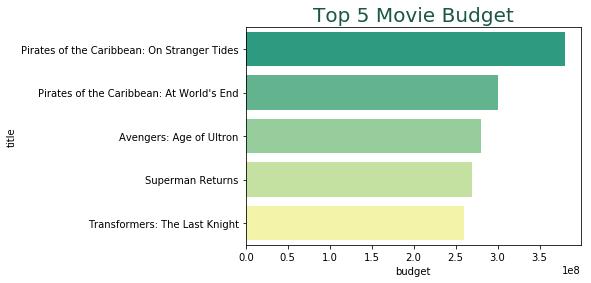

In [34]:
# apa 5 film paling mahal?
sns.barplot(data=md_terpilih.sort_values(by='budget', ascending=False).head(5), x='budget', y='title', 
            orient='horizontal', palette=c_scheme5)
plt.title("Top 5 Movie Budget".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':c_scheme12[0]
    })

Text(0.5, 1.0, 'Top 5 Movie Revenue')

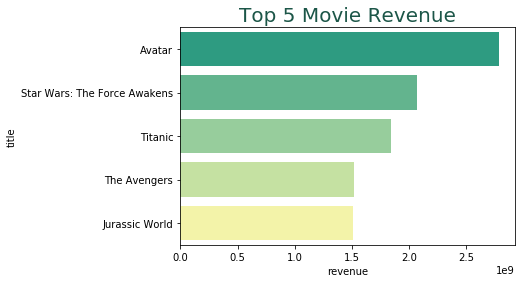

In [35]:
# apa film paling banyak keuntungannya
sns.barplot(data=md_terpilih.sort_values(by='revenue', ascending=False).head(5), x='revenue', y='title', 
            orient='horizontal',  palette=c_scheme5)
plt.title("Top 5 Movie Revenue".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':c_scheme12[0]
    })

**ANALISA BASED ON YEAR**

In [36]:
def get_year(x):
    x = x['release_date']
    x = x.year
    return x

def get_month(x):
    x = x['release_date']
    x = x.month
    return x

def get_day(x):
    x = x['release_date']
    x = x.day
    return x

In [37]:
md_terpilih['year'] = md_terpilih.apply(get_year, axis=1)
md_terpilih['month'] = md_terpilih.apply(get_month, axis=1)
md_terpilih['day'] = md_terpilih.apply(get_day, axis=1)

In [38]:
md_terpilih.columns

Index(['id', 'poster_path', 'title', 'vote_average', 'vote_count',
       'weighted_rating', 'popularity', 'budget', 'revenue', 'runtime',
       'genre_new', 'lang_new', 'name_companies', 'name_country', 'cast_name',
       'director_name', 'overview', 'words', 'release_date', 'year', 'month',
       'day'],
      dtype='object')

Text(0.5, 1.0, 'Tren Budget')

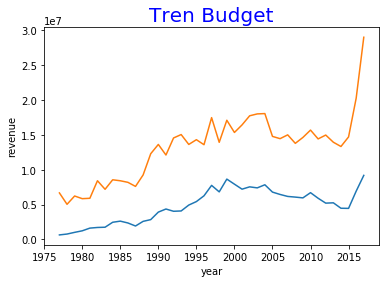

In [39]:
kotak = md_terpilih[(md_terpilih['year']<=2017) & (md_terpilih['year']>=1977)].groupby('year').mean()
sns.lineplot(data=kotak, x=kotak.index, y='budget')
sns.lineplot(data=kotak, x=kotak.index, y='revenue')
plt.title("Tren Budget".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':'blue'
    })

Text(0.5, 1.0, 'BUDGET')

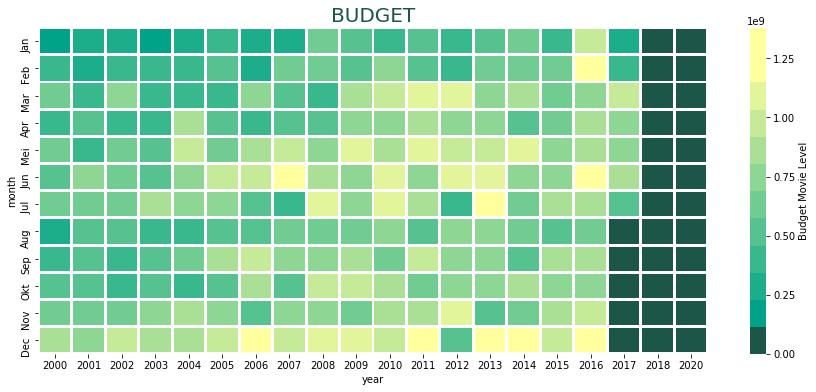

In [40]:
plt.figure(figsize=(15,6))
# c_scheme12.reverse()
sns.heatmap(pd.pivot_table(data=md_terpilih[md_terpilih['year']>=2000], columns='year', index='month', 
                           values='budget',aggfunc='sum').fillna(0), 
            cmap=c_scheme12, linewidths=2,
           yticklabels=['Jan', 'Feb', 'Mar', 'Apr','Mei', 'Jun',' Jul','Aug','Sep','Okt','Nov','Dec'],
           cbar_kws={'label': 'Budget Movie Level'})

plt.title("BUDGET".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':c_scheme12[0]
    })
# c_scheme12.reverse()

Text(0.5, 1.0, 'MAP DISTRIBUSI REVENUE')

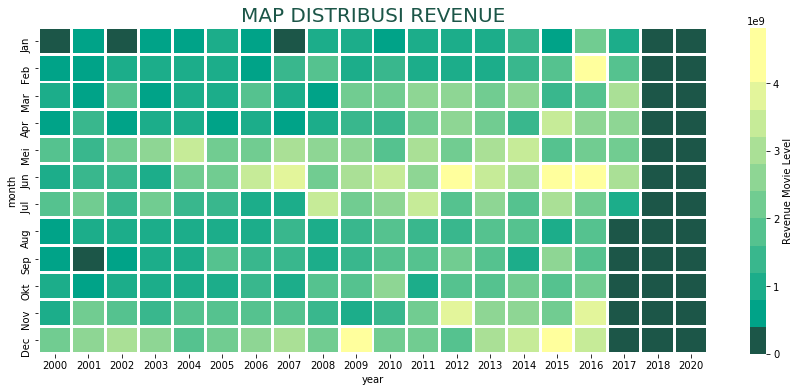

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.pivot_table(data=md_terpilih[md_terpilih['year']>=2000], columns='year', index='month', 
                           values='revenue',aggfunc='sum').fillna(0), 
            cmap=c_scheme12, linewidths=2,
           yticklabels=['Jan', 'Feb', 'Mar', 'Apr','Mei', 'Jun',' Jul','Aug','Sep','Okt','Nov','Dec'],
           cbar_kws={'label': 'Revenue Movie Level'})
plt.title("MAP DISTRIBUSI REVENUE".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':c_scheme12[0]
    })

Text(0.5, 1.0, 'MAP DISTRIBUSI PRODUKSI FILM')

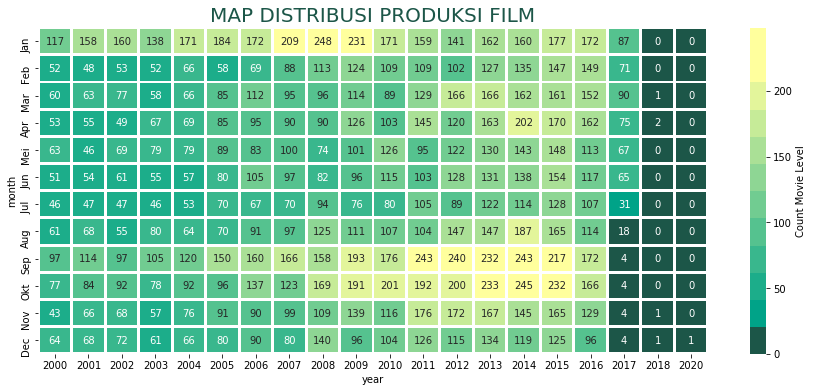

In [42]:
plt.figure(figsize=(15,6))
md_terpilih['year'] = round(md_terpilih['year'])
sns.heatmap(pd.pivot_table(data=md_terpilih[md_terpilih['year']>=2000], 
                           columns='year', index='month', values='title',aggfunc='count').fillna(0), 
                            cmap=c_scheme12, linewidths=2, annot=True, fmt='n',
            yticklabels=['Jan', 'Feb', 'Mar', 'Apr','Mei', 'Jun',' Jul','Aug','Sep','Okt','Nov','Dec'],
           cbar_kws={'label': 'Count Movie Level'})

plt.title("MAP DISTRIBUSI PRODUKSI FILM".format(kotak_tampilkan[i]), fontdict={
        'fontsize':20,
        'color':c_scheme12[0]
    })

In [43]:
md_terpilih.columns

Index(['id', 'poster_path', 'title', 'vote_average', 'vote_count',
       'weighted_rating', 'popularity', 'budget', 'revenue', 'runtime',
       'genre_new', 'lang_new', 'name_companies', 'name_country', 'cast_name',
       'director_name', 'overview', 'words', 'release_date', 'year', 'month',
       'day'],
      dtype='object')

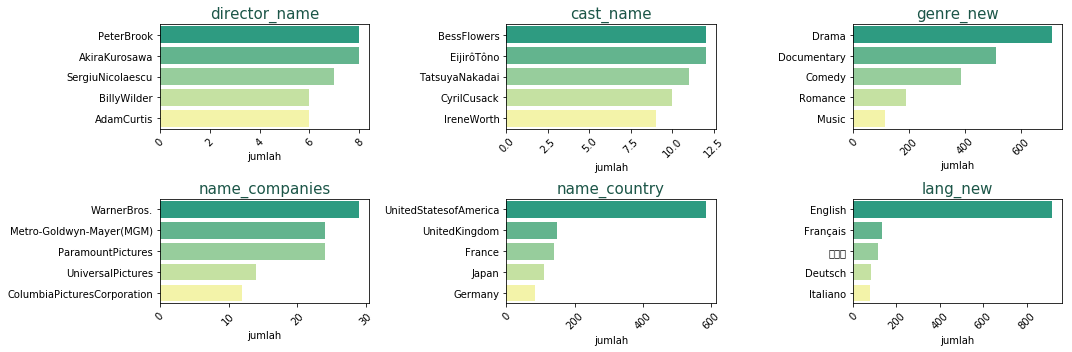

In [44]:
top_five = ['director_name', 'cast_name', 'genre_new', 'name_companies', 'name_country', 'lang_new']
i=1

syarat = md_terpilih[md_terpilih['vote_average']>=8.0]

plt.figure(figsize=(15,5))
for item in top_five:
    a = pd.Series([item for sublist in syarat[item] for item in sublist])
    a = a.value_counts().head(5)
    a = pd.DataFrame(a, columns=['jumlah'])
    plt.subplot(2,3,i)
    sns.barplot(data=a, y=a.index, x='jumlah', orient='horizontal', palette=c_scheme5)
    plt.title(item, fontdict={
        'color':c_scheme12[0],
        'fontsize':15
    })
    plt.xticks(rotation=45)
    i+=1

plt.tight_layout()

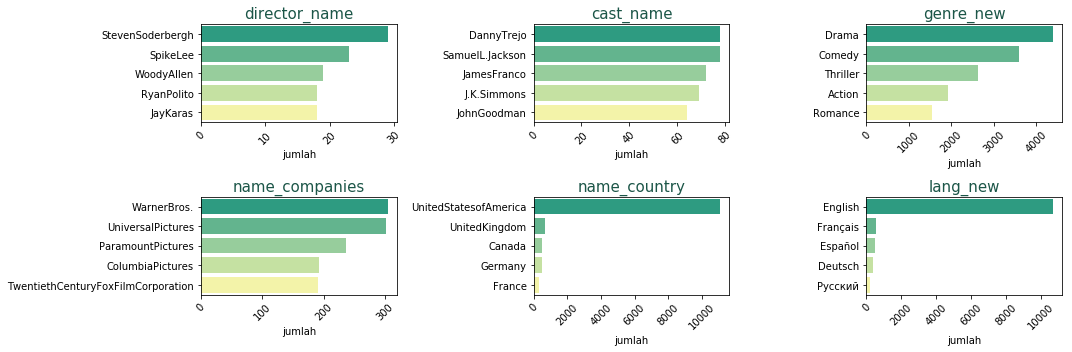

In [45]:
# For America Only
top_five = ['director_name', 'cast_name', 'genre_new', 'name_companies', 'name_country', 'lang_new']
i=1

syarat = md_terpilih['year'] >= 1997
syarat2 = md_terpilih['name_country'].apply(lambda x: 'UnitedStatesofAmerica' in x)
md_america = md_terpilih[syarat&syarat2]

plt.figure(figsize=(15,5))


for item in top_five:
    a = pd.Series([item for sublist in md_america[item] for item in sublist])
    a = a.value_counts().head(5)
    a = pd.DataFrame(a, columns=['jumlah'])
    plt.subplot(2,3,i)
    sns.barplot(data=a, y=a.index, x='jumlah', orient='horizontal', palette=c_scheme5)
    plt.title(item, fontdict={
        'color':c_scheme12[0],
        'fontsize':15
    })
    plt.xticks(rotation=45)
    i+=1
    
plt.tight_layout()


In [46]:
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

In [47]:
# menganalis 
def detail(df_anal, judul='no judul'):

    tipee=type(df_anal.iloc[0])

    if(tipee ==str):
        text = ''.join((item+' ') for item in md_america['words'].dropna())
    elif(tipee==list):
        text = [item for key_w in df_anal for item in key_w]
        text = ' '.join(text)
    else:
        text='kosong'

    # buang kata yang mengandung tanda baca
    text_no_punc = [char for char in text if char not in string.punctuation]
    text_no_punc = ''.join(text_no_punc)
    # buang kata yang mengandung stop words
    text_clean_stopwords = [item for item in text_no_punc.split() if item.lower() not in stopwords.words('english')]
    text_clean_stopwords = ' '.join(text_clean_stopwords)

    my_stopwords =  ['world', 'one', 'new', 'two', 'years', 'find', 'film','life','young', 'finds','soon','found', 
                     'story', 'lives','becomes','time','first', 'based', 'japan', 'japanese', 'indonesia', 'india']
    
    text_clean_stopwords = [item for item in text_clean_stopwords.split() if item.lower() not in my_stopwords]
    text_clean_stopwords = ' '.join(text_clean_stopwords)

    # melihat seluruh kata yang sering muncul
    seluruh_kata = text_clean_stopwords.split()
    count_kata = Counter(seluruh_kata)

    plt.figure(figsize=(12,6))
    sns.set_style('whitegrid')
    df_show = pd.Series(count_kata).sort_values(ascending=False).head(20)
    df_show = pd.DataFrame(df_show, columns=['jumlah'])
    sns.barplot(data=df_show, x=df_show.index, y='jumlah', palette=c_scheme12)
    plt.xticks(rotation=45, fontsize=15)
    plt.title(judul, fontdict={
        'fontsize':25,
        'color' : c_scheme12[0],
        'fontstyle' :'normal'
    })
    plt.show()

    wordcloud = WordCloud(background_color="white").generate(text_clean_stopwords)
    plt.figure(figsize=(12,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## <center>=========== America Part =========</center>

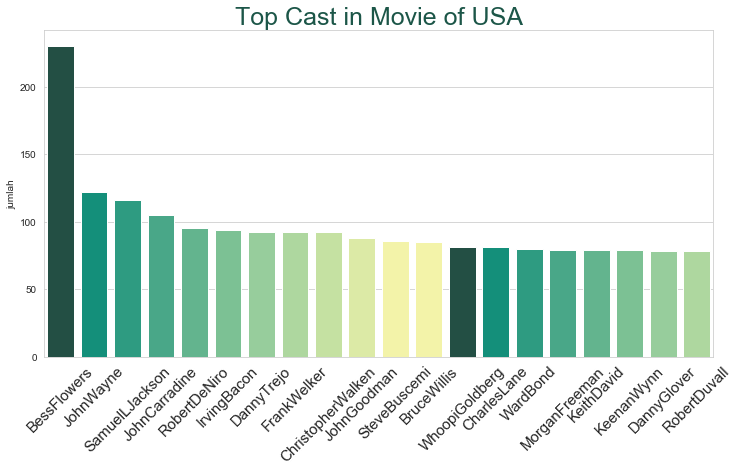

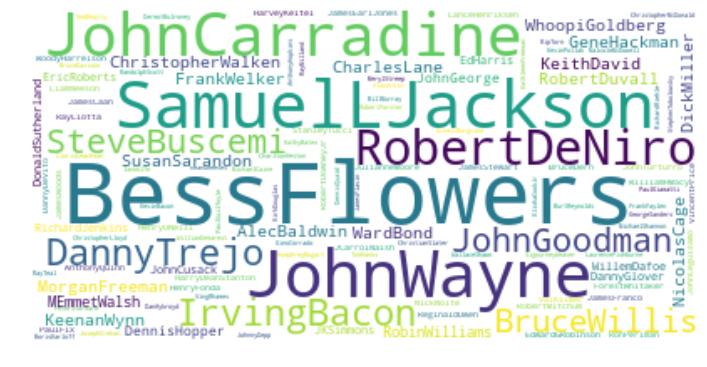

In [48]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'UnitedStatesofAmerica' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)
md_america = md_terpilih[syarat & syarat2]

detail(md_america['cast_name'], 'Top Cast in Movie of USA')

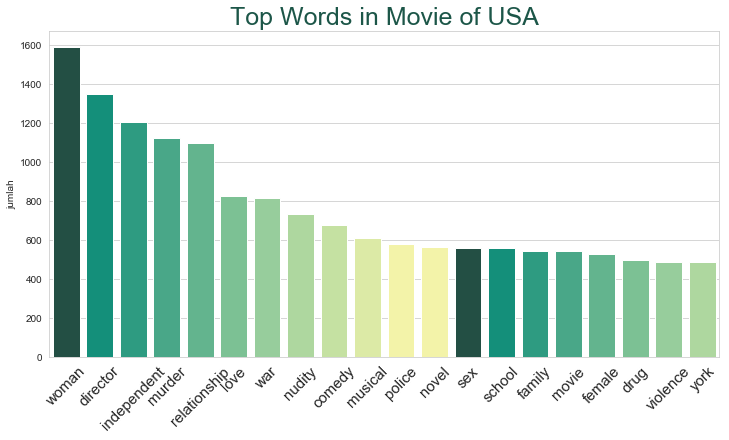

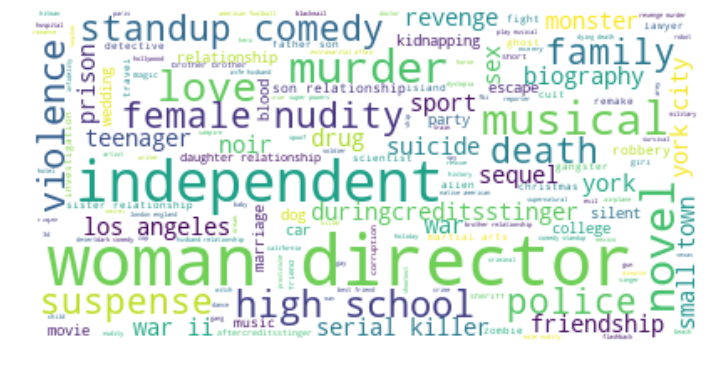

In [49]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'UnitedStatesofAmerica' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_america = md_terpilih[syarat & syarat2]

detail(md_america['words'], 'Top Words in Movie of USA')

## <center>=========== Indonesia Part =========</center>

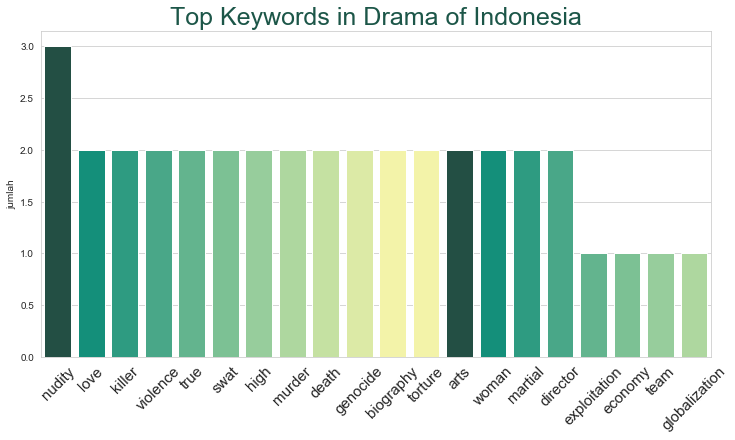

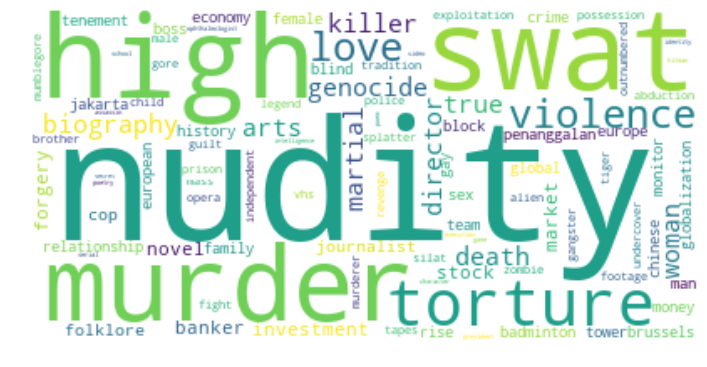

In [50]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'Indonesia' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['words'], 'Top Keywords in Drama of Indonesia')

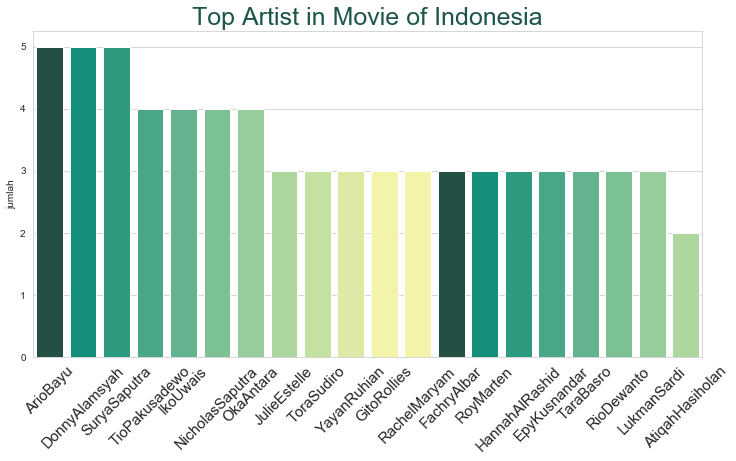

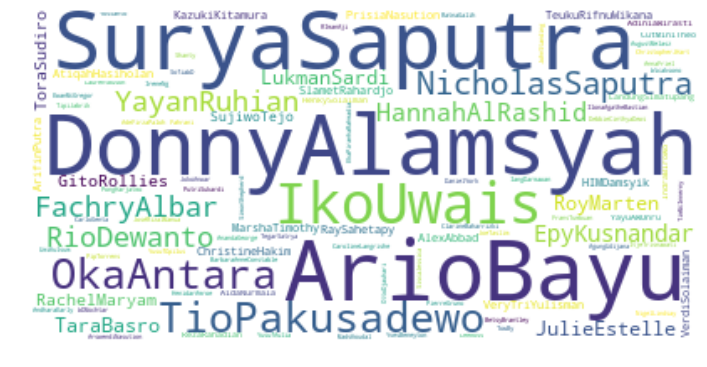

In [51]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'Indonesia' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)
md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['cast_name'], 'Top Artist in Movie of Indonesia')

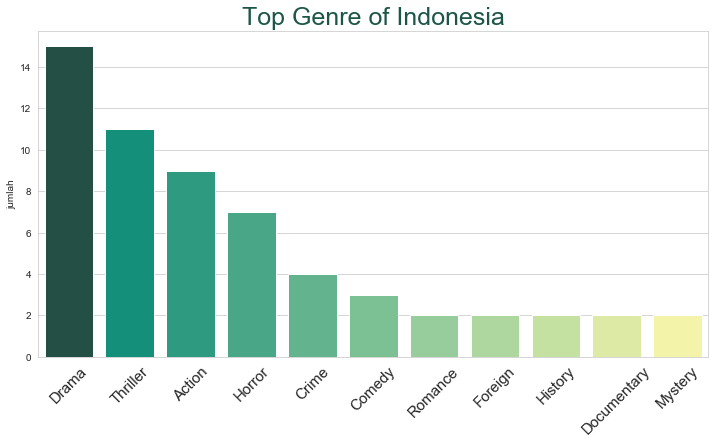

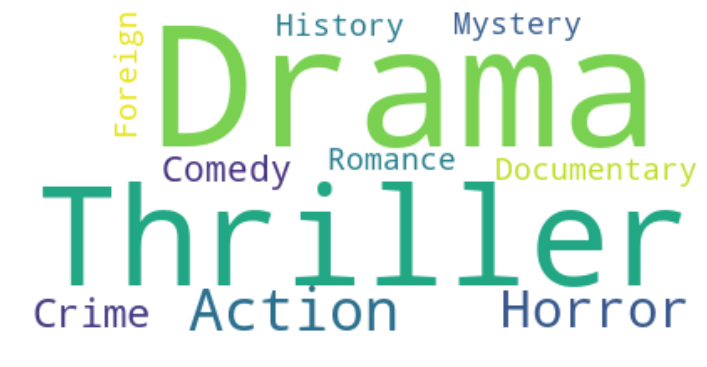

In [52]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'Indonesia' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['genre_new'], 'Top Genre of Indonesia')

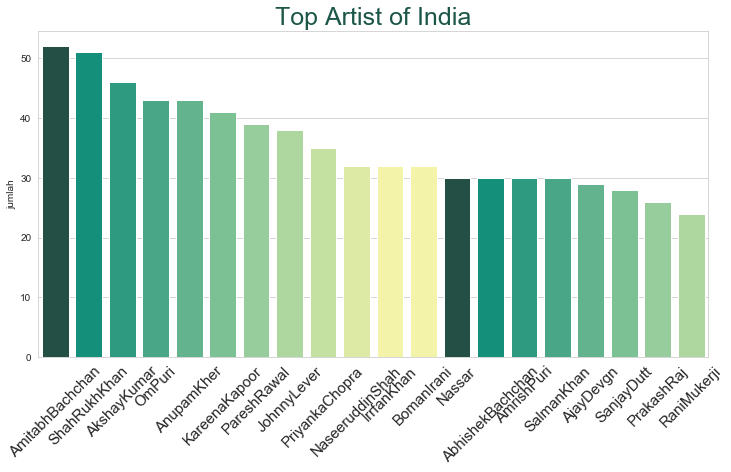

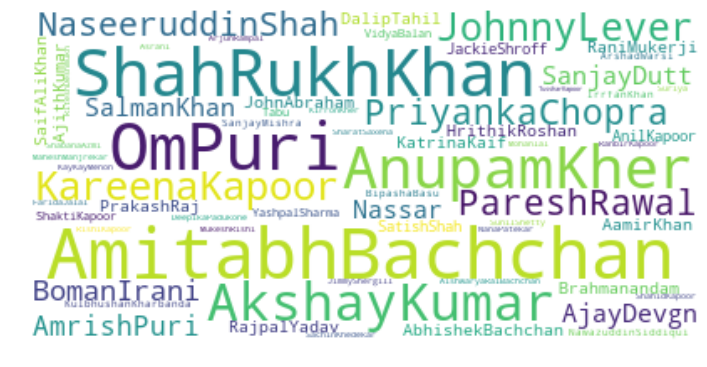

In [53]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'India' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['cast_name'], 'Top Artist of India')

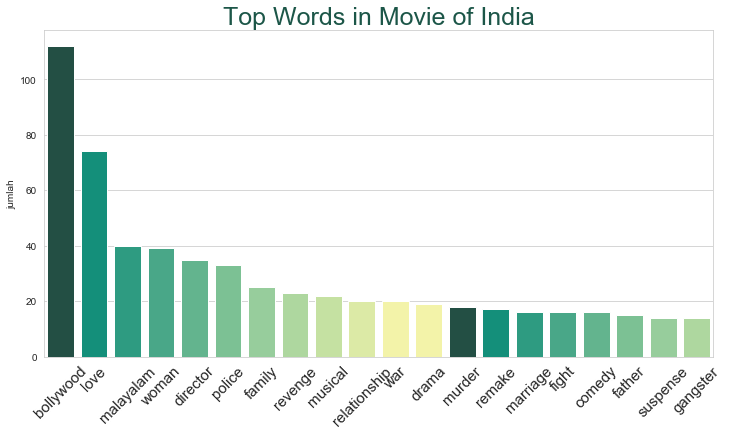

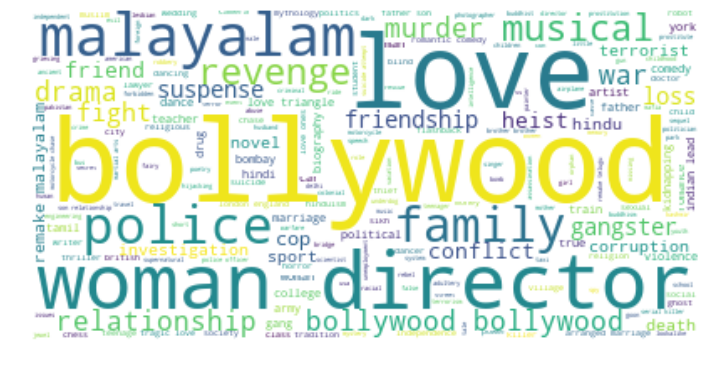

In [54]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'India' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['words'], 'Top Words in Movie of India')

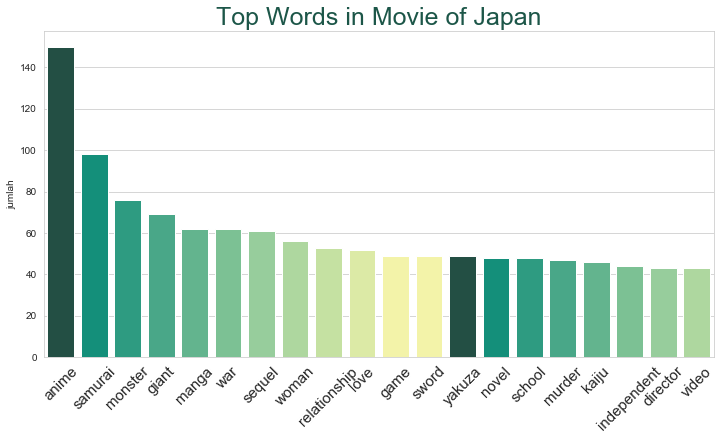

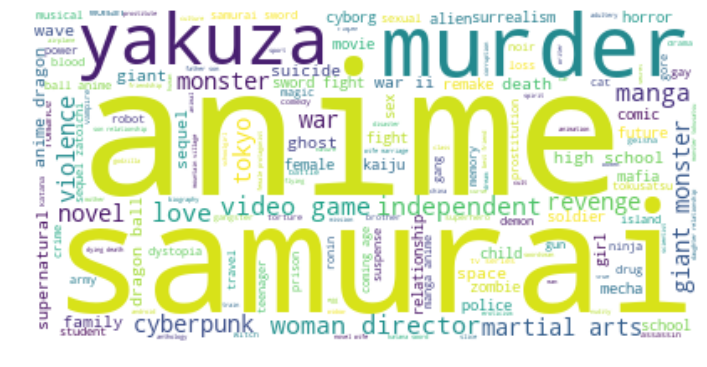

In [55]:
syarat = md_terpilih['year'] <= 2017
syarat2 = md_terpilih['name_country'].apply(lambda x: 'Japan' in x)
syarat3 = md_terpilih['genre_new'].apply(lambda x: 'Drama' in x)

md_indo = md_terpilih[syarat & syarat2]

detail(md_indo['words'], 'Top Words in Movie of Japan')

In [56]:
md_terpilih.to_csv('data_cleaning.csv',sep=',')

In [57]:
md_terpilih.head(2)

,id,poster_path,title,vote_average,vote_count,weighted_rating,popularity,budget,revenue,runtime,genre_new,lang_new,name_companies,name_country,cast_name,director_name,overview,words,release_date,year,month,day
0,862,https://image.tmdb.org/t/p/original/rhIRbceoE9...,Toy Story,7.7,5415.0,7.640091,21.946943,30000000,373554033.0,81.0,"[Animation, Comedy, Family]",[English],[PixarAnimationStudios],[UnitedStatesofAmerica],"[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],"Led by Woody, Andy's toys live happily in his ...","[jealousy, toy, boy, friendship, friends, riva...",1995-10-30,1995,10,30
1,8844,https://image.tmdb.org/t/p/original/vzmL6fP7aP...,Jumanji,6.9,2413.0,6.820579,17.015539,65000000,262797249.0,104.0,"[Adventure, Fantasy, Family]","[English, Français]","[TriStarPictures, TeitlerFilm, InterscopeCommu...",[UnitedStatesofAmerica],"[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],When siblings Judy and Peter discover an encha...,"[board game, disappearance, based on children'...",1995-12-15,1995,12,15
